In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from PIL import Image, ImageDraw, ImageFont

In [2]:
path2img='./IDRID/Images/'
path2labels='./IDRID/Labels/'

# Labels Data Transformations

In [3]:
labels_list=os.listdir(os.path.join(path2labels,'train'))

In [4]:
for excel in labels_list:
    print(pd.read_csv(os.path.join(path2labels,'train',excel)).iloc[0:413,0:3])

    Image name  Retinopathy grade  Risk of macular edema 
0    IDRiD_001                  3                       2
1    IDRiD_002                  3                       2
2    IDRiD_003                  2                       2
3    IDRiD_004                  3                       2
4    IDRiD_005                  4                       0
..         ...                ...                     ...
408  IDRiD_409                  2                       1
409  IDRiD_410                  2                       0
410  IDRiD_411                  2                       0
411  IDRiD_412                  2                       0
412  IDRiD_413                  2                       0

[413 rows x 3 columns]
      Image No  X- Coordinate  Y - Coordinate
0    IDRiD_001         1494.0          1970.0
1    IDRiD_002         2270.0          1329.0
2    IDRiD_003         2109.0          1351.0
3    IDRiD_004         2679.0          1453.0
4    IDRiD_005         2244.0          1404.0
..  

Creating df for train

In [5]:
train_data=pd.read_csv(os.path.join(path2labels,'train','IDRiD_Disease Grading_Training Labels.csv')).iloc[0:413,0:3]
tmp1=pd.read_csv(os.path.join(path2labels,'train','IDRiD_Fovea_Center_Training Set_Markups.csv')).iloc[0:413,1:3]
tmp1.columns=["X Fovea Center","Y Fovea Center"]
train_data=train_data.join(tmp1)
tmp2=pd.read_csv(os.path.join(path2labels,'train','IDRiD_OD_Center_Training Set_Markups.csv')).iloc[0:413,1:3]
tmp2.columns=["X OD Center","Y OD Center"]
train_data = train_data.rename(columns={"Risk of macular edema ":"Risk of macular edema"})
train_data = train_data.join(tmp2)

In [6]:
#data.to_csv(os.path.join(path2labels,'train/labels.csv'))
train_data

,Image name,Retinopathy grade,Risk of macular edema,X Fovea Center,Y Fovea Center,X OD Center,Y OD Center
0,IDRiD_001,3,2,1494.0,1970.0,2858.0,1805.0
1,IDRiD_002,3,2,2270.0,1329.0,943.0,1119.0
2,IDRiD_003,2,2,2109.0,1351.0,779.0,1269.0
3,IDRiD_004,3,2,2679.0,1453.0,1292.0,1284.0
4,IDRiD_005,4,0,2244.0,1404.0,1037.0,1198.0
...,...,...,...,...,...,...,...
408,IDRiD_409,2,1,1536.0,1614.0,2900.0,1516.0
409,IDRiD_410,2,0,1903.0,1606.0,3035.0,1554.0
410,IDRiD_411,2,0,2412.0,1584.0,1105.0,1318.0
411,IDRiD_412,2,0,1996.0,1917.0,3203.0,1711.0


./IDRID/Images/train/IDRiD_001.jpg 
Retinopathy grade: 3 
Risk of macular edema 2
./IDRID/Images/train/IDRiD_002.jpg 
Retinopathy grade: 3 
Risk of macular edema 2
./IDRID/Images/train/IDRiD_003.jpg 
Retinopathy grade: 2 
Risk of macular edema 2
./IDRID/Images/train/IDRiD_004.jpg 
Retinopathy grade: 3 
Risk of macular edema 2
./IDRID/Images/train/IDRiD_005.jpg 
Retinopathy grade: 4 
Risk of macular edema 0
./IDRID/Images/train/IDRiD_006.jpg 
Retinopathy grade: 4 
Risk of macular edema 1
./IDRID/Images/train/IDRiD_007.jpg 
Retinopathy grade: 4 
Risk of macular edema 0
./IDRID/Images/train/IDRiD_008.jpg 
Retinopathy grade: 4 
Risk of macular edema 2
./IDRID/Images/train/IDRiD_009.jpg 
Retinopathy grade: 3 
Risk of macular edema 2


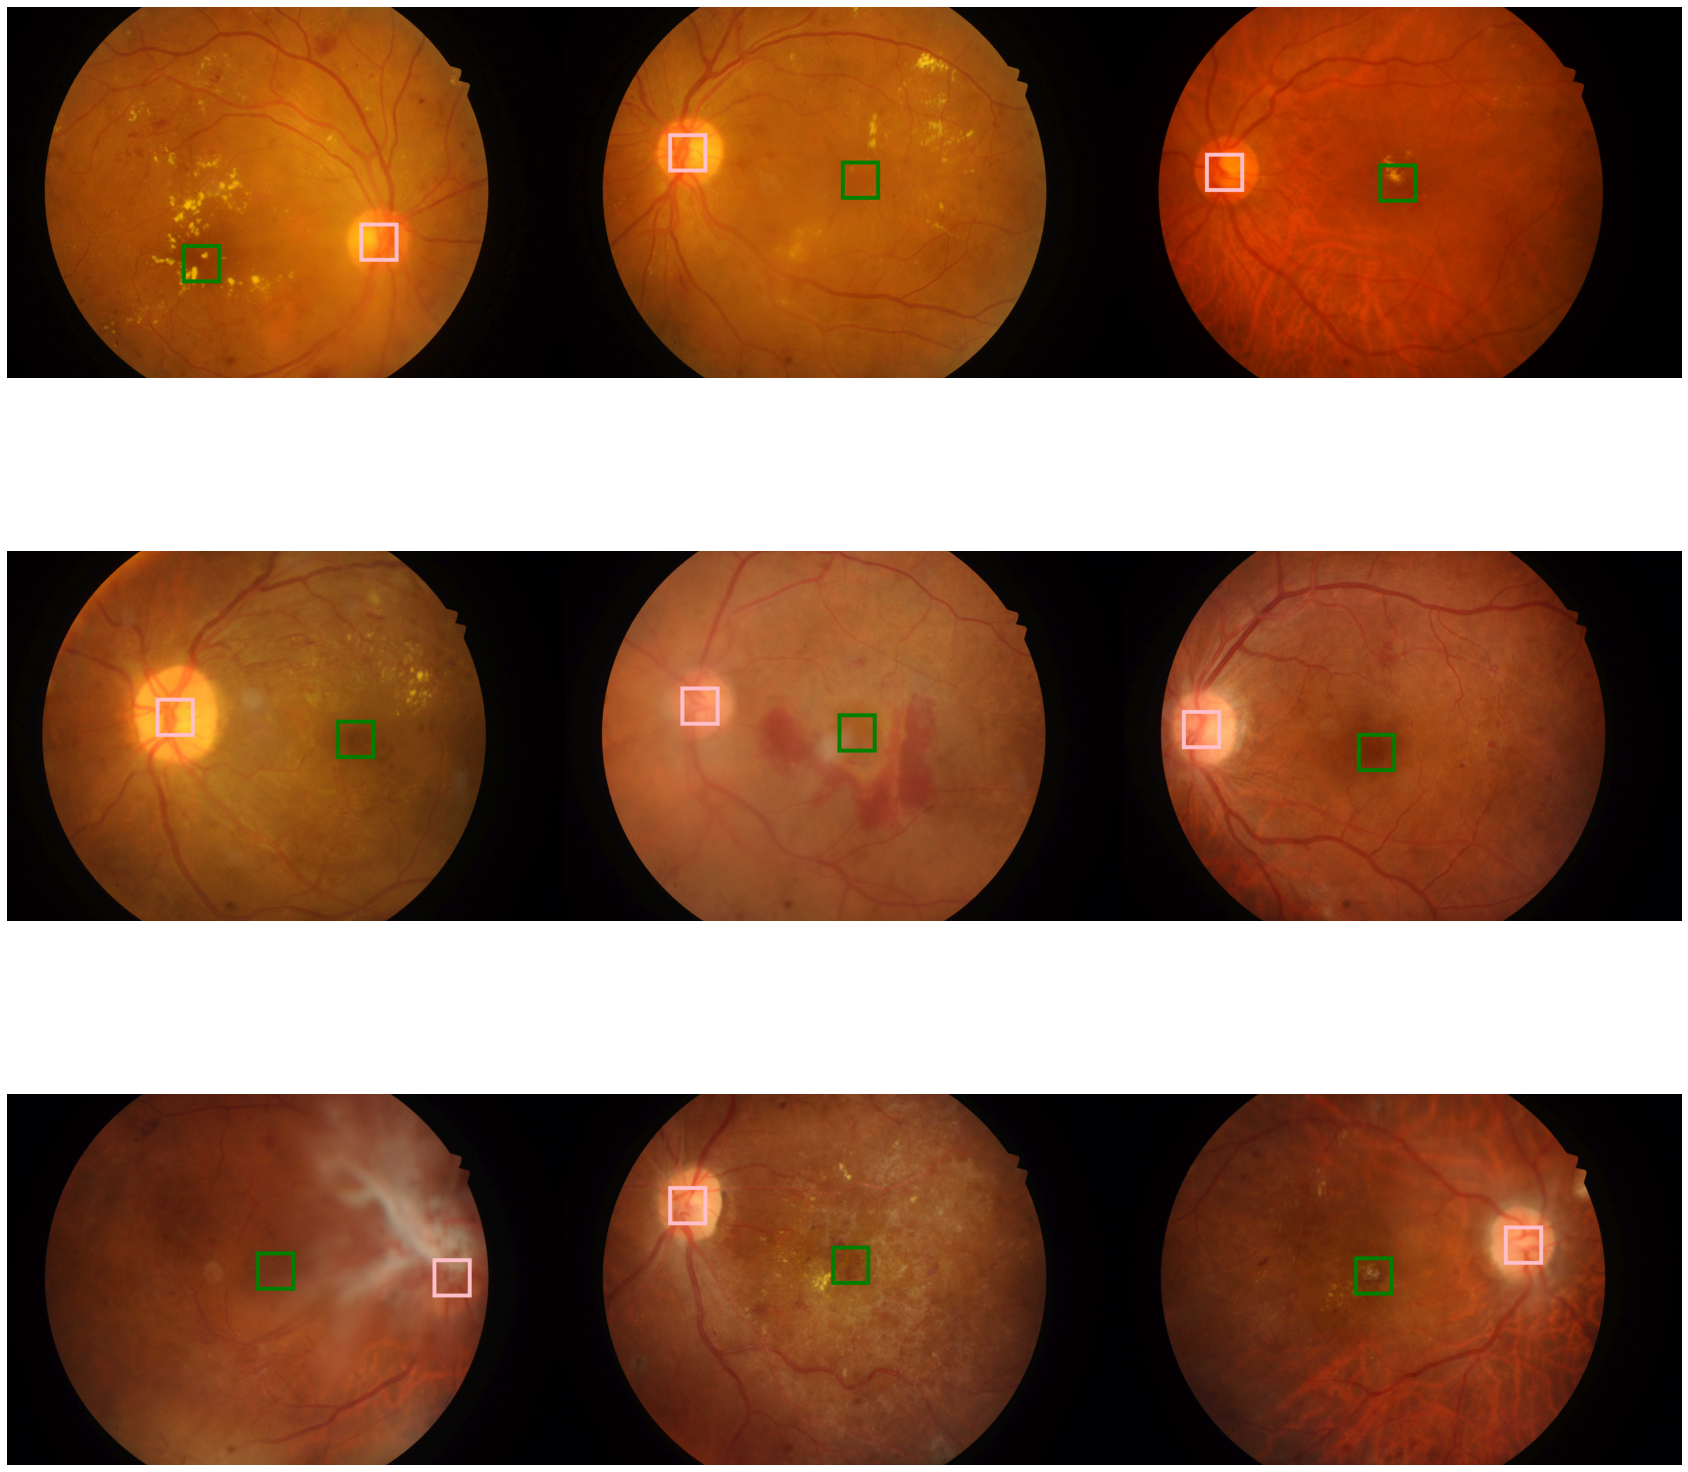

In [7]:
plt.rcParams['figure.figsize']=(30.0,30.0)
plt.subplots_adjust(wspace=0,hspace=0)
nrows,ncols=3,3
box=150
width=30
for i,j in enumerate(train_data.iloc[0:9,0]):
    full_filename=os.path.join(path2img,'train/',j+'.jpg')
    print(full_filename,"\nRetinopathy grade:",train_data.iloc[i,1],"\nRisk of macular edema",train_data.iloc[i,2])
    img=Image.open(full_filename)
    draw=ImageDraw.Draw(img)
    draw.rectangle(((train_data.iloc[i,3]-box,train_data.iloc[i,4]-box),
                    (train_data.iloc[i,3]+box,train_data.iloc[i,4]+box)),
                   outline='green',width=width)
    draw.rectangle(((train_data.iloc[i,5]-box,train_data.iloc[i,6]-box),
                    (train_data.iloc[i,5]+box,train_data.iloc[i,6]+box)),
                   outline='pink',width=width)
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(np.array(img))
    plt.axis('off')

Creating df for test

In [8]:
test_data=pd.read_csv(os.path.join(path2labels,'test','IDRiD_Disease Grading_Testing Labels.csv')).iloc[0:413,0:3]
tmp3=pd.read_csv(os.path.join(path2labels,'test','IDRiD_Fovea_Center_Testing Set_Markups.csv')).iloc[0:413,1:3]
tmp3.columns=["X Fovea Center","Y Fovea Center"]
test_data=test_data.join(tmp3)
tmp4=pd.read_csv(os.path.join(path2labels,'test','IDRiD_OD_Center_Testing Set_Markups.csv')).iloc[0:413,1:3]
tmp4.columns=["X OD Center","Y OD Center"]
test_data = test_data.rename(columns={"Risk of macular edema ":"Risk of macular edema"})
test_data=test_data.join(tmp4)
#data.to_csv(os.path.join(path2labels,'test/labels.csv'))
test_data

,Image name,Retinopathy grade,Risk of macular edema,X Fovea Center,Y Fovea Center,X OD Center,Y OD Center
0,IDRiD_001,4,0,1914.0,1617.0,651.0,1453.0
1,IDRiD_002,4,1,1922.0,1468.0,3158.0,1280.0
2,IDRiD_003,4,0,2566.0,1591.0,1101.0,1374.0
3,IDRiD_004,4,0,1562.0,1550.0,2881.0,1430.0
4,IDRiD_005,4,1,1757.0,1310.0,2840.0,1175.0
...,...,...,...,...,...,...,...
98,IDRiD_099,0,0,2495.0,1464.0,1116.0,1321.0
99,IDRiD_100,2,1,2180.0,1531.0,913.0,1276.0
100,IDRiD_101,1,0,1674.0,1846.0,2900.0,1696.0
101,IDRiD_102,2,2,2356.0,1745.0,992.0,1520.0


In [9]:
test_data.columns

Index(['Image name', 'Retinopathy grade', 'Risk of macular edema',
       'X Fovea Center', 'Y Fovea Center', 'X OD Center', 'Y OD Center'],
      dtype='object')

In [10]:
train_data.columns

Index(['Image name', 'Retinopathy grade', 'Risk of macular edema',
       'X Fovea Center', 'Y Fovea Center', 'X OD Center', 'Y OD Center'],
      dtype='object')